# Preprocessing

In [20]:
import h5py
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from einops import rearrange, repeat

root_path = Path.cwd().parent

with h5py.File(root_path / "data/lotka_volterra_data.h5", "r") as f:
    print("Datasets:", list(f.keys()))
    time_data = f["time"][:]
    traj_data = f["trajectories"][:]

print(time_data.shape)
print(traj_data.shape)

Datasets: ['time', 'trajectories']
(100,)
(1000, 100, 2)


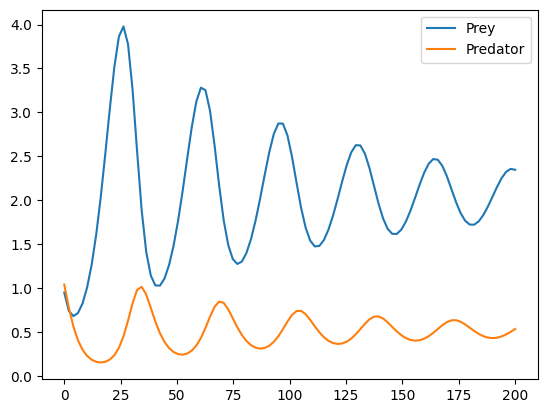

In [21]:
t = time_data
system = 0
prey = traj_data[system, :, 0]
predator = traj_data[system, :, 1]

plt.plot(t, prey, label="Prey")
plt.plot(t, predator, label="Predator")
plt.legend()
plt.show();

# We need to find a good choice of $\alpha$

I propose for now $\alpha = 0.9$ is a good starting point, but it is a hyperparameter to choose in training.
Thus each time series $X_n = \{(prey_i, pred_i)\}_{i=1}^{100}$ will be split chronologically into (training, validation, test) = $(60, 20, 20)$.
Then we calculate the $\alpha$ percentile of the training set, then divide through to force this $\alpha$ percentile to be 10. We then apply the same transformation to the validation and test sets, saving the value of used.

Do we calculate the percentile of each species and scale them independently to the range or do we scale each sequence? I say we do of each series, since the scale of numbers have importance between prey and predator.

In [ ]:
# Scaling each time series to match the same percentiles

alpha = 90

t0 = 0
t1 = 60
t2 = 80
t3 = 100

train = traj_data[:, t0:t1, :]
val = traj_data[:, t1:t2, :]
test = traj_data[:, t2:t3, :]

train_flattened = rearrange(train, "b x y ->  b (x y)")
percentile_values = np.percentile(train_flattened, alpha, axis=1)
percentile_values_broadcast = repeat(percentile_values, "b -> b 1 1")
train_scaled = train / percentile_values_broadcast

train_scaled_flattened = rearrange(train_scaled, "b x y -> b (x y)")
percentile_values_scaled = np.percentile(train_scaled_flattened, alpha, axis=1)

print(f"Unscaled {alpha} percentiles: Mean = {np.mean(percentile_values):.5f}, Std = {np.std(percentile_values):.5f}")
print(f"Scaled {alpha} percentiles: Mean = {np.mean(percentile_values_scaled):.5f}, Std = {np.std(percentile_values_scaled):.5f}")

Unscaled 90 percentiles: Mean = 2.48102, Std = 1.49838
Scaled 90 percentiles: Mean = 1.00000, Std = 0.00000


In [ ]:
# Converting to string format, same as before

In [ ]:
# Testing the new implementation in the package
from m2_cw import load_and_preprocess

train_texts, val_texts = load_and_preprocess("data/lotka_volterra_data.h5")
print(len(train_texts))
print(len(val_texts))

1000
1000
603
196
